# Knapsack Problem

I have $m$ elements, each with a value $c$ and a weight $w$, to be stored into a knapsack with a weightt total of $W$.$\\$ I need to maximize the sum of $c$ into the knapsack while keeping the restriction of the maximum weight:

$$
    W = \sum\,w_{j}\\
 w_{j}\,\epsilon\,[1, 1000]\; \text{uniform generated} \\
 c_{j}\,\epsilon\,[1, 1000]\; \text{uniform generated} 
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from deap import base, creator, tools

In [2]:
# Set the seed of our random generator in order to allow replication of the data
random.seed(a=79514)
np.random.seed(0)

In [3]:
# Create classes for our genetic alghoritm
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

In [4]:
IND_SIZE=(10, 50, 100, 200, 500, 1000) #Various sizes of our problem
TOURN_SIZE = 3 #Size of tournament block

#Initialization of our random generator
toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: random.randint(0,1))


#Operators
#Crossover
toolbox.register('mate', tools.cxTwoPoint)
#Mutation
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
#Selection
toolbox.register('select', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('select_r', tools.selRoulette)

In [5]:
#Evaluate function
n = 10
weights = [random.uniform(1, 1000) for _ in range(n)] #by definition of weights given by the problem
values = [random.uniform(1, 1000) for _ in range(n)]  #by definition of values given by the problem
W = sum(weights)/2

def evaluate(individual, weights=weights, values=values, W=W):
    fit = 0 
    total_weight= 0
    for i, c, w in zip(individual, values, weights):
        fit += i*c
        total_weight += i*w
    if total_weight<W:
        return fit #in case we're under our threshold limit
    else:
        return -10000 #in case we surpass the limit the evaluation return a non-signifivative value
        

toolbox.register('evaluate', evaluate)

#Statistical Features
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [6]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, stats, weights, values, size): #other than the usual arguments, the function takes also the weights and values specified and the size of our problem
    #Defininf Hall of Fame
    hof = tools.HallOfFame(1)
    HOF = [] #List created in order to store the best-weight (the maximum under the treshold) processed for every generation
    
    #Creating the population
    #individuals
    toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=size) #here we can decide which size of our problem we are considering
    #population
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    
    pop = toolbox.population(n=POP_SIZE)

    #Defining the Logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])

    #Evaluate the entire population
    fitness = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitness):
        ind.fitness.values = [fit]


    hof.update(pop) if stats else {}

    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    

    for g in range(NGEN):
        #Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        #Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        #Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitness):
            ind.fitness.values = [fit]

        if hof is not None:
            hof.update(offspring)

        #The population in entirely replaced by the offspring
        pop[:] = tools.selBest(offspring, POP_SIZE-1)
        pop.append(hof[0])
        HOF.append(hof[0]) #here, for instance, we add the best individual for eache iteration (generation) to the HOF list created above


        record = stats.compile(pop) if stats else{}
        logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
        

    return pop, logbook, HOF #we return also the HOF list in order to evaluate the evolution of best-weights per generation

In [7]:
#Application of our funciton for each problem size required (IND_SIZE)
GA_exe = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, stats=stats, weights=weights, values=values, size=IND_SIZE[0])
GA_exe1 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, stats=stats, weights=weights, values=values, size=IND_SIZE[1] )
GA_exe2 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, stats=stats, weights=weights, values=values, size=IND_SIZE[2] )
GA_exe3 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, stats=stats, weights=weights, values=values, size=IND_SIZE[3] )
GA_exe4 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, stats=stats, weights=weights, values=values, size=IND_SIZE[4] )
GA_exe5 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, stats=stats, weights=weights, values=values, size=IND_SIZE[5] )

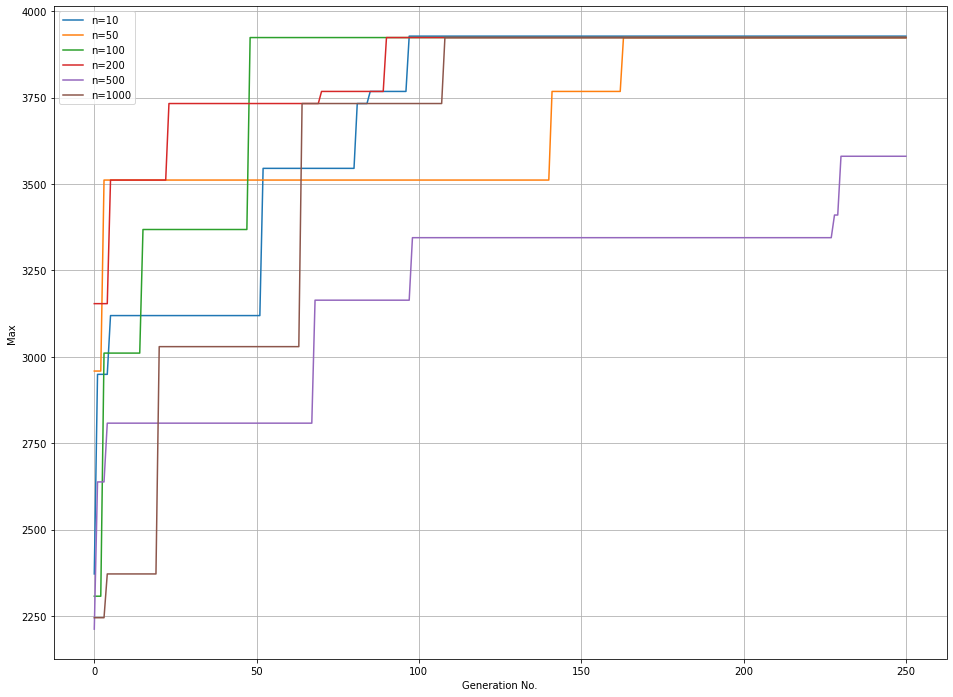

In [8]:
# Computing our fitness values (the max in this case) for each call of the GA
max_values = [GA_exe[1][i]['max'] for i in range(len(GA_exe[1]))]
max_values1 = [GA_exe1[1][i]['max'] for i in range(len(GA_exe1[1]))]
max_values2 = [GA_exe2[1][i]['max'] for i in range(len(GA_exe2[1]))]
max_values3 = [GA_exe3[1][i]['max'] for i in range(len(GA_exe3[1]))]
max_values4 = [GA_exe4[1][i]['max'] for i in range(len(GA_exe4[1]))]
max_values5 = [GA_exe5[1][i]['max'] for i in range(len(GA_exe4[1]))]
ngen = [i for i in range(len(GA_exe[1]))]


#Plotting the max evolution for each generation, comparing the spline for each problem size
fig, ax1 = plt.subplots(figsize=(16,12))
ax1.plot(ngen, max_values, label="n=10")
ax1.plot(ngen, max_values1, label="n=50")
ax1.plot(ngen, max_values2, label="n=100")
ax1.plot(ngen, max_values3, label="n=200")
ax1.plot(ngen, max_values4, label="n=500")
ax1.plot(ngen, max_values5, label="n=1000")
ax1.set_xlabel("Generation No.")
ax1.set_ylabel("Max")
ax1.grid()
ax1.legend()
plt.show()

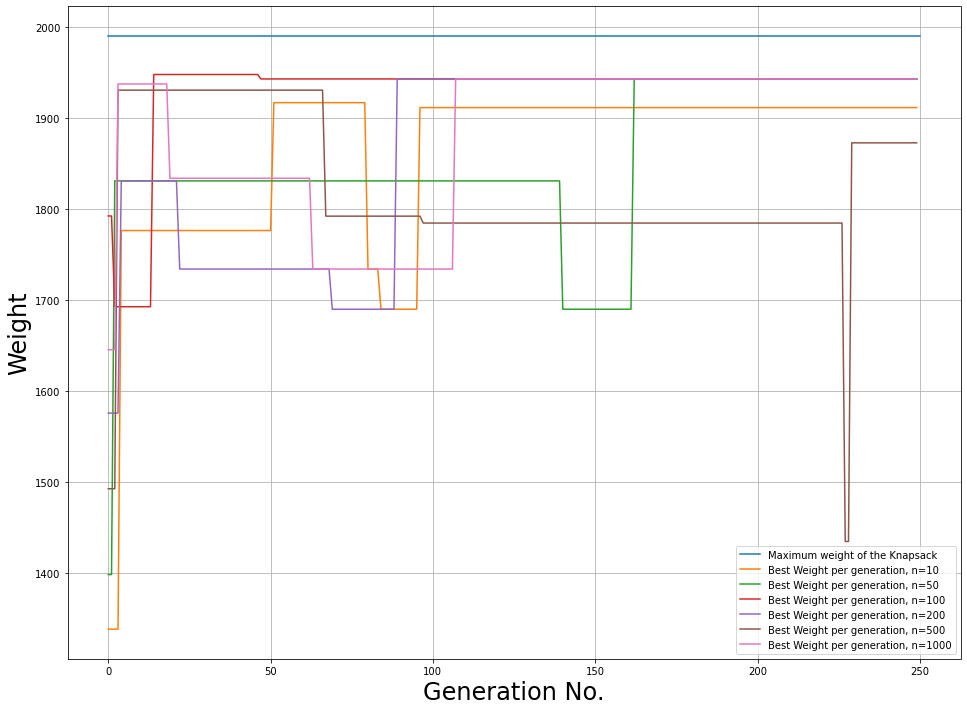

In [9]:
#Taking the best individual for eache generation (stored in the HOF list) and multpiplying it with the weights list in order to compute the best-weight under the treshold limit, for each generation
def best(f):
    best_weight=[]
    for i in f[2]:
        somma = 0
        for j, k in zip(i, weights):
            somma+=j*k
        best_weight.append(somma)
    ngen = [i for i in range(len(f[1])-1)]
    return ngen, best_weight
    
# Plotting the evolution  (spline) of best-weight progressing in generations and comparing the curves for each problem size
fig, ax1 = plt.subplots(figsize=(16,12))
ax1.plot(np.linspace(0,250,1000), np.ones(1000)*W, label = "Maximum weight of the Knapsack")
ax1.plot(best(GA_exe)[0], best(GA_exe)[1], label= "Best Weight per generation, n=10")
ax1.plot(best(GA_exe1)[0], best(GA_exe1)[1], label= "Best Weight per generation, n=50")
ax1.plot(best(GA_exe2)[0], best(GA_exe2)[1], label= "Best Weight per generation, n=100")
ax1.plot(best(GA_exe3)[0], best(GA_exe3)[1], label= "Best Weight per generation, n=200")
ax1.plot(best(GA_exe4)[0], best(GA_exe4)[1], label= "Best Weight per generation, n=500")
ax1.plot(best(GA_exe5)[0], best(GA_exe5)[1], label= "Best Weight per generation, n=1000")
ax1.grid()
ax1.legend()
ax1.set_xlabel("Generation No.", size= 24)
ax1.set_ylabel("Weight", size= 24)
ax1.legend()
plt.show()